In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)
x_train

In [ ]:
import os
import keras
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import random
import time
model = keras.applications.VGG16(weights='imagenet',include_top=True)

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
  img = image.load_img(path,target_size=model.input_shape[1:3])
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  return img,x

In [ ]:
file_endings = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def files(directory):
    files = []
    for root, directories, filenames in os.walk(directory):
        for filename in filenames:
            if any(ext in filename for ext in file_endings):
                files.append(os.path.join(root, filename))
    return files
directory = 'drive/MyDrive/101_ObjectCategories'
filenames = sorted(files(directory))

shape of x:  (1, 224, 224, 3)
data type:  float32


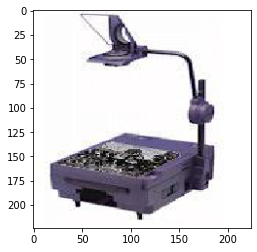

In [ ]:
img,x = load_image(filenames[234])
print("shape of x: ",x.shape)
print("data type: ",x.dtype)
plt.imshow(img)

In [ ]:

predictions = model.predict(x)
max = 0
#print(predictions)
for _, pred,prob in decode_predictions(predictions)[0]:
  if(max<prob):
    max = prob
    max_pred = pred
  print("predicted %s with probability %0.3f" %(pred,prob))
print("most probability is %s with maximum probability via  %0.4f" %(max_pred,max))

predicted radio with probability 0.292
predicted scale with probability 0.235
predicted potter's_wheel with probability 0.120
predicted barbell with probability 0.035
predicted power_drill with probability 0.034
most probability is radio with maximum probability via  0.2920


In [ ]:

feat_extractor = Model(inputs=model.input,outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

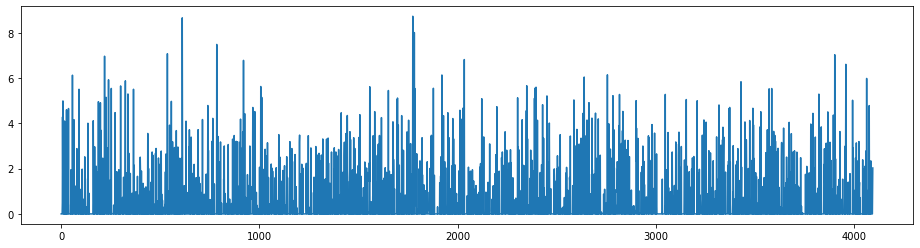

In [ ]:
img,x = load_image(filenames[0])
feat = feat_extractor.predict(x)
plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:
images_path = 'drive/MyDrive/101_ObjectCategories'
image_extensions=['.jpg','.png','.jpeg']
max_num_images = 10000 #keep the number less than 30 if running on cpu for faster results
tick = time.time()
# dp has the root directory,dn has the sub directories and filenames has the file name

images = [os.path.join(dp,f) for dp,dn,filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images<len(images):
  #get random images from the image paths
  images = [images[i] for i in sorted(random.sample(range(len(images)),max_num_images))] #comment this and uncomment the below line if running on cpu to get better matches
#   images = images[0:max_num_images]
print("keeping %d images to analyze" %len(images))

keeping 9154 images to analyze


In [41]:
tic = time.time()
features = []
for i, image_path in enumerate(images):
  if i%1000 == 0:
    toc = time.time()
    elap = toc-tic;
    print("analyzing image %d / %d. Time taken : %4.4f seconds"%(i,len(images),elap))
    tic= time.time()
  img,x = load_image(image_path)
  feat = feat_extractor.predict(x)[0]
  features.append(feat)
print('finished extracting features for %d images' % len(images))

analyzing image 0 / 9154. Time taken : 0.0001 seconds
analyzing image 500 / 9154. Time taken : 490.7820 seconds
analyzing image 1000 / 9154. Time taken : 490.6019 seconds
analyzing image 1500 / 9154. Time taken : 491.3762 seconds
analyzing image 2000 / 9154. Time taken : 481.7860 seconds
analyzing image 2500 / 9154. Time taken : 494.9459 seconds
analyzing image 3000 / 9154. Time taken : 485.0022 seconds
analyzing image 3500 / 9154. Time taken : 486.0796 seconds
analyzing image 4000 / 9154. Time taken : 480.6207 seconds
analyzing image 4500 / 9154. Time taken : 481.8440 seconds
analyzing image 5000 / 9154. Time taken : 477.5279 seconds
analyzing image 5500 / 9154. Time taken : 480.5317 seconds
analyzing image 6000 / 9154. Time taken : 484.0107 seconds
analyzing image 6500 / 9154. Time taken : 485.0361 seconds
analyzing image 7000 / 9154. Time taken : 487.7729 seconds


KeyboardInterrupt: ignored

In [42]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

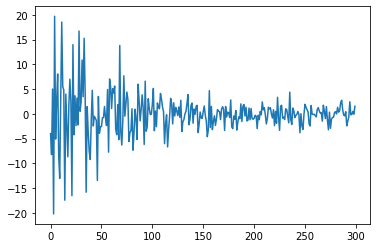

In [43]:
pca_features = pca.transform(features)
plt.plot(pca_features[2])

In [45]:
from scipy.spatial import distance

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

In [46]:
def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Text(0.5, 1.0, 'Result images')

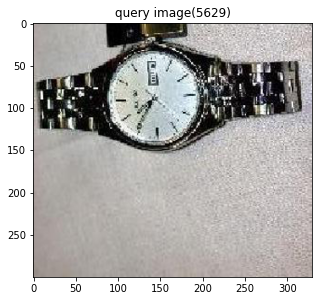

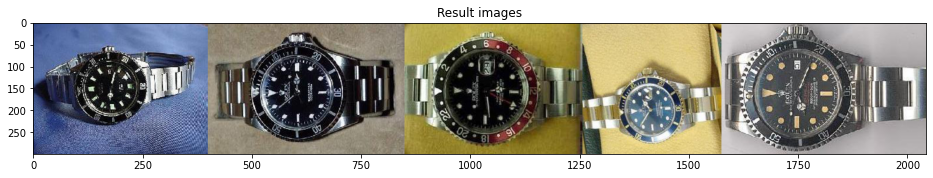

In [47]:
import random
query_image_idx = int(len(images)*random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx],300)
results_image = get_concatenated_images(idx_closest,300)

plt.figure(figsize=(5,5))
plt.imshow(query_image)
plt.title("query image(%d)" %query_image_idx)

plt.figure(figsize=(16,22))
plt.imshow(results_image)
plt.title("Result images")